<a href="https://colab.research.google.com/github/nawwafansyori/Data_Analytics/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [7]:
!kaggle datasets download -d muratkokludataset/date-fruit-datasets

  0% 0.00/408k [00:00<?, ?B/s]
100% 408k/408k [00:00<00:00, 37.7MB/s]


In [8]:
!ls

date-fruit-datasets.zip  russia_losses_equipment.csv  Tugas4.ipynb
kaggle.json		 russia_losses_personnel.csv
melville-moby_dick.txt	 taxi_tripdata.csv


In [9]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  date-fruit-datasets.zip
  inflating: Date_Fruit_Datasets/Date_Fruit_Datasets.arff  
  inflating: Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx  
  inflating: Date_Fruit_Datasets/Date_Fruit_Datasets_Citation_Request.txt  


In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
! pip install openpyxl

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [23]:
data=pd.read_excel('Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [24]:
data.shape

(898, 35)

In [25]:
data.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [26]:
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [27]:
data.duplicated().value_counts()

False    898
dtype: int64

In [28]:
data.Class.value_counts()

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

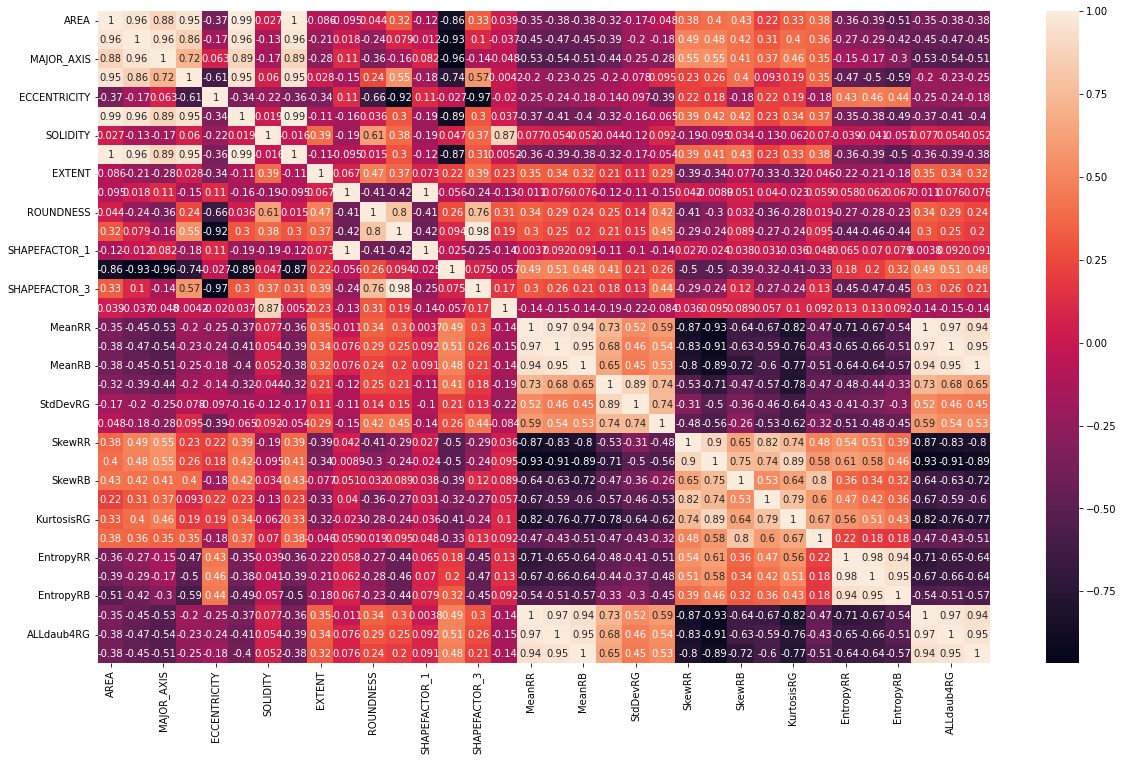

In [29]:
sns.heatmap(data.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [30]:
x=data.iloc[:,:-1]
le=LabelEncoder()
le.fit(data["Class"])
y=le.transform(data["Class"])
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,stratify=y)

In [31]:
model_type=[LogisticRegression(),DecisionTreeClassifier(),SVC()]

LogisticRegression()  Classification Report 
               precision    recall  f1-score   support

       BERHI       1.00      1.00      1.00        13
      DEGLET       0.88      0.75      0.81        20
       DOKOL       0.95      1.00      0.98        41
       IRAQI       1.00      1.00      1.00        14
      ROTANA       1.00      1.00      1.00        33
      SAFAVI       0.93      0.97      0.95        40
       SOGAY       0.83      0.79      0.81        19

    accuracy                           0.94       180
   macro avg       0.94      0.93      0.94       180
weighted avg       0.94      0.94      0.94       180
 



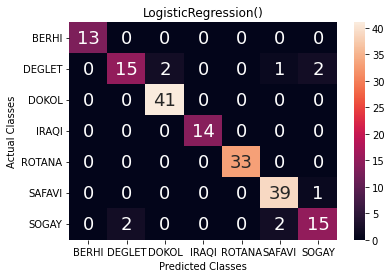

DecisionTreeClassifier()  Classification Report 
               precision    recall  f1-score   support

       BERHI       0.73      0.85      0.79        13
      DEGLET       0.74      0.70      0.72        20
       DOKOL       0.95      0.95      0.95        41
       IRAQI       0.83      0.71      0.77        14
      ROTANA       0.97      0.97      0.97        33
      SAFAVI       0.97      0.97      0.97        40
       SOGAY       0.65      0.68      0.67        19

    accuracy                           0.88       180
   macro avg       0.84      0.83      0.83       180
weighted avg       0.88      0.88      0.88       180
 



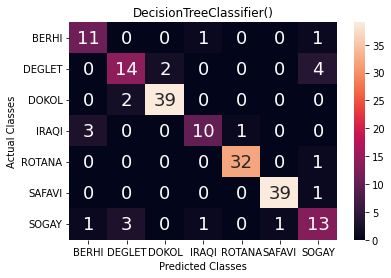

SVC()  Classification Report 
               precision    recall  f1-score   support

       BERHI       0.92      0.92      0.92        13
      DEGLET       0.72      0.65      0.68        20
       DOKOL       0.93      0.95      0.94        41
       IRAQI       1.00      0.93      0.96        14
      ROTANA       1.00      1.00      1.00        33
      SAFAVI       0.97      0.97      0.97        40
       SOGAY       0.76      0.84      0.80        19

    accuracy                           0.92       180
   macro avg       0.90      0.90      0.90       180
weighted avg       0.92      0.92      0.92       180
 



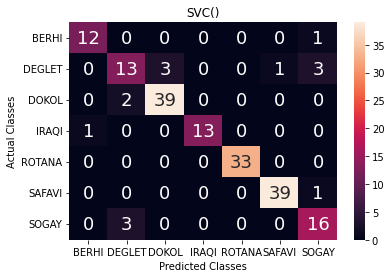

In [32]:
for model in model_type:
    pipe=make_pipeline(StandardScaler(),model)
    pipe.fit(x_train,y_train)
    y_predict=pipe.predict(x_test)
    
    print(model," Classification Report \n",classification_report(y_test,y_predict,target_names=data["Class"].unique()),"\n")
    
    cm_data = pd.DataFrame(confusion_matrix(y_test,y_predict), index=data["Class"].unique(), columns=data["Class"].unique())  
    sns.heatmap(cm_data, annot=True, annot_kws={"size": 18}, fmt="d") 
    plt.title(model)
    plt.ylabel('Actual Classes')
    plt.xlabel('Predicted Classes')
    plt.show()
    